Cargando y analizando precios promedio por área...
Datos de precios cargados exitosamente.
Resumen de datos:
  neighbourhood_group     room_type  precio_promedio
0             Arverne           250         2.000000
1              Harlem            80         5.000000
2    Long Island City            93         1.000000
3       Staten Island  Private room        62.494624
4             Astoria           170         3.000000


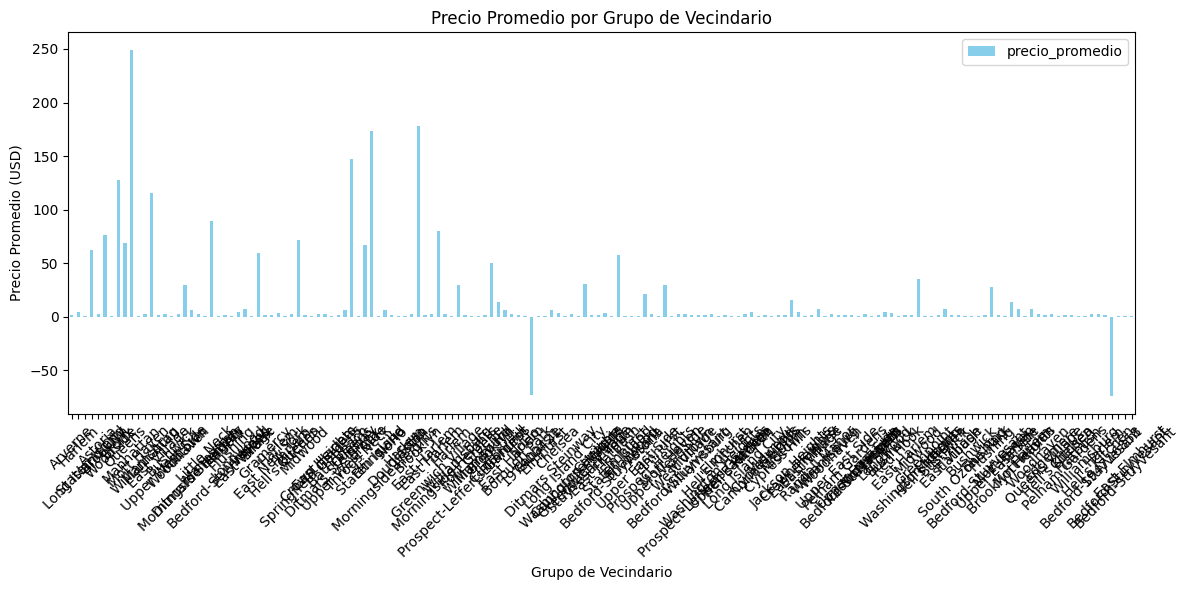


Cargando y analizando los anfitriones más activos...
Datos de anfitriones cargados exitosamente.
Resumen de datos:
     host_id       host_name  total_listados  total_reviews
0  219517861    Sonder (NYC)             327         1281.0
1  107434423      Blueground             232           29.0
2   30283594            Kara             121           65.0
3  137358866          Kazuya             103           87.0
4   16098958  Jeremy & Laura              96          138.0


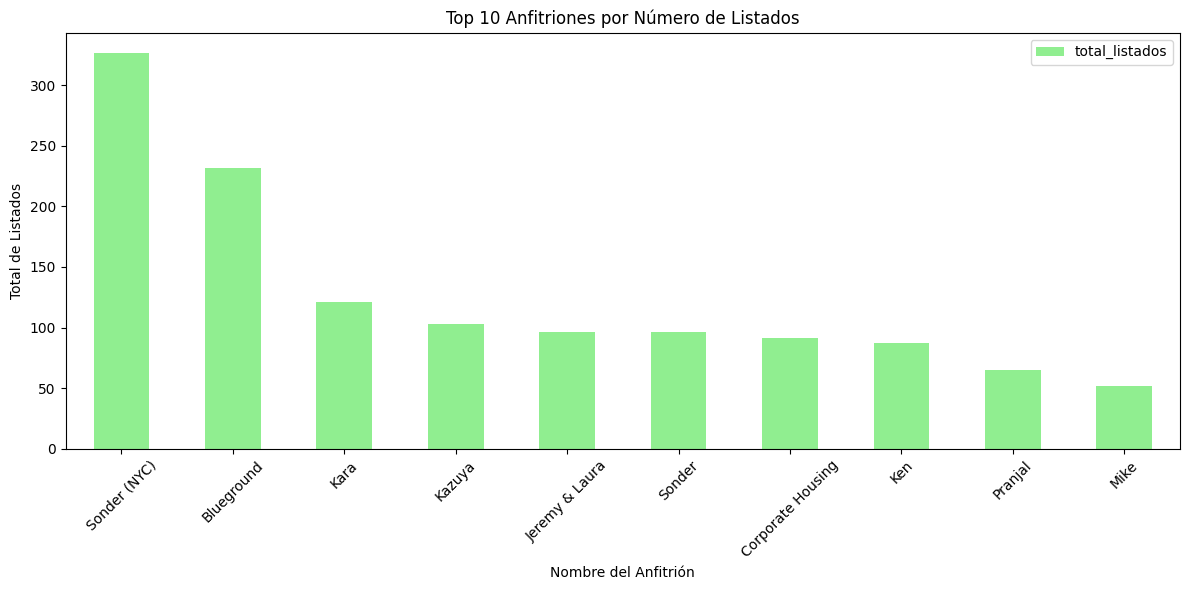

In [1]:
# Importa las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define la ruta a la capa Gold
gold_data_path = '/app/gold_data/'

# --- Análisis 1: Precios promedio por área y tipo de habitación ---
print("Cargando y analizando precios promedio por área...")
precios_path = os.path.join(gold_data_path, 'precios_por_area')

# Carga los archivos Parquet en un DataFrame de Spark
try:
    df_precios = pd.read_parquet(precios_path)
    print("Datos de precios cargados exitosamente.")
    print("Resumen de datos:")
    print(df_precios.head())
    
    # Crea un gráfico de barras para visualizar los precios promedio
    df_precios.plot(x='neighbourhood_group', y='precio_promedio', kind='bar', figsize=(12, 6), color='skyblue')
    plt.title('Precio Promedio por Grupo de Vecindario')
    plt.xlabel('Grupo de Vecindario')
    plt.ylabel('Precio Promedio (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error al cargar los datos de precios: {e}")

# --- Análisis 2: Los 10 anfitriones más activos ---
print("\nCargando y analizando los anfitriones más activos...")
anfitriones_path = os.path.join(gold_data_path, 'anfitriones_clave')

# Carga los archivos Parquet
try:
    df_anfitriones = pd.read_parquet(anfitriones_path)
    print("Datos de anfitriones cargados exitosamente.")
    print("Resumen de datos:")
    print(df_anfitriones.head())

    # Selecciona los 10 anfitriones con más listados
    top_anfitriones = df_anfitriones.nlargest(10, 'total_listados')

    # Crea un gráfico de barras para visualizar los anfitriones clave
    top_anfitriones.plot(x='host_name', y='total_listados', kind='bar', figsize=(12, 6), color='lightgreen')
    plt.title('Top 10 Anfitriones por Número de Listados')
    plt.xlabel('Nombre del Anfitrión')
    plt.ylabel('Total de Listados')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error al cargar los datos de anfitriones: {e}")
